In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [15]:
FILE_PATH = os.getcwd() + '/data/meetingCodesAll.xlsx'


df = pd.read_excel(FILE_PATH)
df.head()

,Team Name,Meeting Date,Meeting Starting Time,User Name,Text time,Text,Code
0,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:04:00,@here howdy! who’s here for our weekly <meetin...,Social
1,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:05:00,Here is the agenda for today: https://make.wor...,Administration
2,Accessibility,2020-02-28,2020-02-28 16:04:00,**ryokuhi**,2020-02-28 16:05:00,(on \n and a terrible connection),Administration
3,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:07:00,First item: Improve the Handbook recommendatio...,Planning
4,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:07:00,It’s related to this handbook page: (edited),Planning


In [16]:
print(df.shape)
for text in df['Team Name'].unique():
    print(text , ' have ' , len( df.loc[df['Team Name'] == text]) , ' sentence block')

(3040, 7)
Accessibility  have  575  sentence block
Community  have  403  sentence block
Documentation  have  813  sentence block
Polyglots  have  357  sentence block
Training  have  271  sentence block
Forums  have  621  sentence block


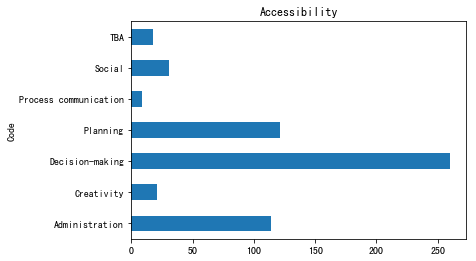

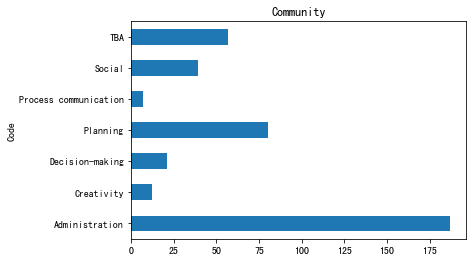

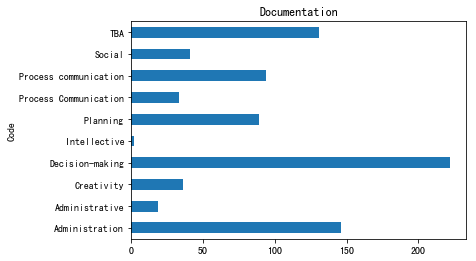

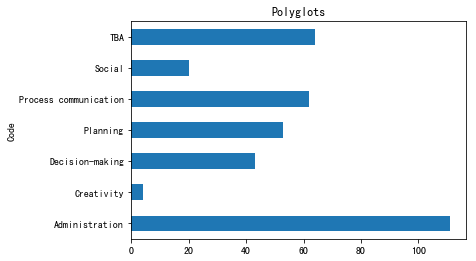

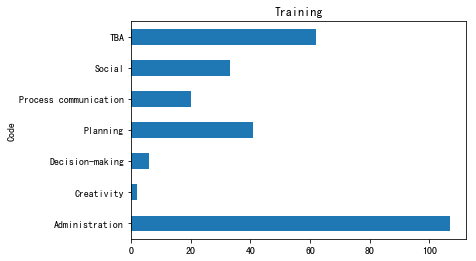

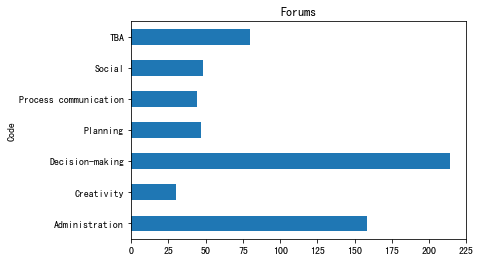

In [17]:
for text in df['Team Name'].unique():
    plt.figure()
    df.loc[df['Team Name'] == text].groupby(['Code'])['Text '].count().plot(kind = 'barh')
    plt.title(text)

data 有點髒，所以我們要先把document 的data 清一清。

In [18]:
print(df['Code'].nunique())
df['Code'].unique()

10


array(['Social', 'Administration', 'Planning', 'Decision-making', 'TBA',
       'Process communication', 'Creativity', 'Intellective',
       'Process Communication', 'Administrative'], dtype=object)

In [19]:
df.query('Code == "Intellective"')

,Team Name,Meeting Date,Meeting Starting Time,User Name,Text time,Text,Code
1133,Documentation,2020-02-10,2020-02-10 15:00:00,**leogermani**,2020-02-10 15:22:00,"oh yes, that's right. Let me check last meetin...",Intellective
1135,Documentation,2020-02-10,2020-02-10 15:00:00,**zzap**,2020-02-10 15:22:00,"yes, her deadline was 14th/15th",Intellective


In [20]:
df.query('Code == "Administration"')

,Team Name,Meeting Date,Meeting Starting Time,User Name,Text time,Text,Code
1,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:05:00,Here is the agenda for today: https://make.wor...,Administration
2,Accessibility,2020-02-28,2020-02-28 16:04:00,**ryokuhi**,2020-02-28 16:05:00,(on \n and a terrible connection),Administration
14,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:12:00,Next up: Accessibility team goals for WP 5.5,Administration
45,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:36:00,"well, I’ll summarize that in the meeting recap",Administration
46,Accessibility,2020-02-28,2020-02-28 16:04:00,**audrasjb**,2020-02-28 16:36:00,Next item?,Administration
...,...,...,...,...,...,...,...
3012,Forums,2020-01-16,2020-01-16 17:00:00,**clorith**,2020-01-16 17:31:00,"If someone wants to spearhead that, I'm all fo...",Administration
3020,Forums,2020-01-16,2020-01-16 17:00:00,**clorith**,2020-01-16 17:40:00,"Well, if someone wants to take the reins on th...",Administration
3021,Forums,2020-01-16,2020-01-16 17:00:00,**clorith**,2020-01-16 17:40:00,"All right, let's see if we can get some Open f...",Administration
3035,Forums,2020-01-16,2020-01-16 17:00:00,**clorith**,2020-01-16 17:50:00,"We're nearing the top of the hour, any other l...",Administration


感覺可以將intelligence改成admin，不然太過於imbalace

# Data Cleansing

For Code = Documentation 
1. Process Communication → Process communication
2. Administrative → Administration
3. Intelligent → Administration

For all
1. Encoding our label 'Code' to numbers

In [21]:
#Doc
df.Code = df.Code.replace('Process Communication' , 'Process communication')
df.Code = df.Code.replace('Administrative' , 'Administration')
df.Code = df.Code.replace('Intellective' , 'Administration')


#All
Code_labeling_dict = dict()

number = 0
for code in df['Code'].unique():
    Code_labeling_dict[code] = number
    number = number + 1 
print('Our code labeling are below :')

# df.Code = df.Code.replace(Code_labeling_dict)

Code_labeling_dict


Our code labeling are below :


{'Social': 0,
 'Administration': 1,
 'Planning': 2,
 'Decision-making': 3,
 'TBA': 4,
 'Process communication': 5,
 'Creativity': 6}

# Data Process

1. Split data to train and val to fast-bert

Take each code into split group 


train/test ratio = 8:2

In [22]:
code_num_dict = dict(df.Code.value_counts())




collect_train_data = []
collect_test_data = []
collect_valid_data = []
for key , value in code_num_dict.items():
    print('processing ' , key)
    split_size_ratio = 0.8
    this_code_df = df.loc[df.Code == key].reset_index(drop = True)
    split_size = int(value * split_size_ratio)
    bridge = int((value - split_size)/2)
    middle_size = split_size + bridge
    train_data = this_code_df.iloc[:split_size , :]
    test_data = this_code_df.iloc[split_size:middle_size , :]
    valid_data = this_code_df.iloc[middle_size: , :]
    
    
    collect_train_data.append(train_data)
    collect_test_data.append(test_data)
    collect_valid_data.append(valid_data)
    
train_data = pd.concat(collect_train_data).reset_index(drop = True)
test_data = pd.concat(collect_test_data).reset_index(drop = True)
valid_data = pd.concat(collect_valid_data).reset_index(drop = True)

processing  Administration
processing  Decision-making
processing  Planning
processing  TBA
processing  Process communication
processing  Social
processing  Creativity


In [23]:
print('Train data label')
print(train_data.Code.value_counts(normalize = True))
print('-' * 100)
print('Test data label')
print(test_data.Code.value_counts(normalize = True))
print('-' * 100)
print('Valid data label')
print(valid_data.Code.value_counts(normalize = True))

Train data label
Administration           0.277892
Decision-making          0.251956
Planning                 0.141622
TBA                      0.135858
Process communication    0.088514
Social                   0.069576
Creativity               0.034582
Name: Code, dtype: float64
----------------------------------------------------------------------------------------------------
Test data label
Administration           0.277228
Decision-making          0.254125
Planning                 0.141914
TBA                      0.135314
Process communication    0.089109
Social                   0.069307
Creativity               0.033003
Name: Code, dtype: float64
----------------------------------------------------------------------------------------------------
Valid data label
Administration           0.275974
Decision-making          0.250000
Planning                 0.142857
TBA                      0.136364
Process communication    0.087662
Social                   0.071429
Creativity    

In [27]:
""" fast BERT """
# def transform_data_to_fast_bert(data):
#     code_data = pd.get_dummies(data.Code).reset_index(drop = True)
#     code_data['Text'] = data['Text ']
#     return code_data


# final_train_data = transform_data_to_fast_bert(train_data)
# final_test_data =  transform_data_to_fast_bert(test_data)


train_df = train_data[[ 'Text ', 'Code']].copy()
test_df = test_data[[ 'Text ', 'Code']].copy()
valid_df = valid_data[[ 'Text ', 'Code']].copy()

train_df.Code = train_df.Code.replace(Code_labeling_dict)
test_df.Code = test_df.Code.replace(Code_labeling_dict)
valid_df.Code = valid_df.Code.replace(Code_labeling_dict)


display(train_df.head())

,Text,Code
0,Here is the agenda for today: https://make.wor...,1
1,(on \n and a terrible connection),1
2,Next up: Accessibility team goals for WP 5.5,1
3,"well, I’ll summarize that in the meeting recap",1
4,Next item?,1


In [28]:
train_df.columns = ['text' , 'label']
test_df.columns = ['text' , 'label']
valid_df.columns = ['text' , 'label']

# Export

In [29]:
train_df.to_csv('train.csv' , index = False)
test_df.to_csv('test.csv' , index=False)
valid_df.to_csv('dev.csv' , index=False)